In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Handle scientific values
pd.options.display.float_format = '{:.2f}'.format
# Regular expressions for string manipulation
import re
import warnings
warnings.filterwarnings('ignore')
from math import pi
np.seterr(divide='ignore', invalid='ignore')
%matplotlib inline 

In [2]:
# Importing dataset, look and feel of the data
loan_df = pd.read_csv(r'C:\Users\keshi\OneDrive\Documents\Lending Club Case Study\loan.csv', low_memory=False)
loan_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [3]:
# Dataset Rows and columns information 
loan_df.info()
loan_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(73), int64(14), object(24)
memory usage: 33.6+ MB


(39717, 111)

In [4]:
# Understanding the coloumns, importing data dictionary file
dict_df = pd.read_excel(r'C:\Users\keshi\OneDrive\Documents\Lending Club Case Study\Data_Dictionary.xlsx').dropna()
dict_df.style.set_properties(subset=['Description'], **{'width': '1000px'})


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [5]:
# Missing values and their percentages w.r.t total values, 
def miss_val(df):
    df_m = pd.DataFrame({'Count':df.isna().sum(),'Percentage':(df.isna().sum()/len(df))*100})
    df_sm = df_m.sort_values(by = 'Percentage', ascending = False)
    print (df_sm.to_string())

miss_val(loan_df)

                                Count  Percentage
verification_status_joint       39717      100.00
annual_inc_joint                39717      100.00
mo_sin_old_rev_tl_op            39717      100.00
mo_sin_old_il_acct              39717      100.00
bc_util                         39717      100.00
bc_open_to_buy                  39717      100.00
avg_cur_bal                     39717      100.00
acc_open_past_24mths            39717      100.00
inq_last_12m                    39717      100.00
total_cu_tl                     39717      100.00
inq_fi                          39717      100.00
total_rev_hi_lim                39717      100.00
all_util                        39717      100.00
max_bal_bc                      39717      100.00
open_rv_24m                     39717      100.00
open_rv_12m                     39717      100.00
il_util                         39717      100.00
total_bal_il                    39717      100.00
mths_since_rcnt_il              39717      100.00


In [6]:
# Dropping entire blank coloumns,loan_df1 will hold the cleansed data set
loan_df1 = pd.DataFrame(loan_df)
loan_df1 = loan_df1.dropna(axis=1,how='all')
#
miss_val(loan_df1)
print (loan_df.shape)
print (loan_df1.shape)

                            Count  Percentage
next_pymnt_d                38577       97.13
mths_since_last_record      36931       92.99
mths_since_last_delinq      25682       64.66
desc                        12940       32.58
emp_title                    2459        6.19
emp_length                   1075        2.71
pub_rec_bankruptcies          697        1.75
last_pymnt_d                   71        0.18
chargeoff_within_12_mths       56        0.14
collections_12_mths_ex_med     56        0.14
revol_util                     50        0.13
tax_liens                      39        0.10
title                          11        0.03
last_credit_pull_d              2        0.01
home_ownership                  0        0.00
int_rate                        0        0.00
out_prncp_inv                   0        0.00
total_pymnt                     0        0.00
total_pymnt_inv                 0        0.00
total_rec_prncp                 0        0.00
total_rec_int                   0 

In [7]:
# Removing further columns with % > 30 and other redundant columns 
loan_df1.drop(["next_pymnt_d","mths_since_last_record","mths_since_last_delinq","desc","url"], axis = 1, inplace = True)
miss_val(loan_df1)
print (loan_df1.shape)



                            Count  Percentage
emp_title                    2459        6.19
emp_length                   1075        2.71
pub_rec_bankruptcies          697        1.75
last_pymnt_d                   71        0.18
collections_12_mths_ex_med     56        0.14
chargeoff_within_12_mths       56        0.14
revol_util                     50        0.13
tax_liens                      39        0.10
title                          11        0.03
last_credit_pull_d              2        0.01
total_rec_prncp                 0        0.00
total_acc                       0        0.00
initial_list_status             0        0.00
out_prncp                       0        0.00
out_prncp_inv                   0        0.00
total_pymnt                     0        0.00
total_pymnt_inv                 0        0.00
policy_code                     0        0.00
application_type                0        0.00
total_rec_late_fee              0        0.00
recoveries                      0 

In [8]:
# Missing value treatment

print (loan_df1['emp_title'].describe())
print (loan_df1['emp_length'].describe())
print (loan_df1['pub_rec_bankruptcies'].describe())
print (loan_df1['last_pymnt_d'].describe())
print (loan_df1['title'].describe())
print (loan_df1['last_credit_pull_d'].describe())

# Even though this appraoch of filling the mean values could potentially affect the overall outcome, We are still doing it for the purpose
# of demonstaration
#fill the emp_title with "US Army" as it has the highest frequency

loan_df1.loc[pd.isnull(loan_df1['emp_title']), ['emp_title']] = 'US Army'

#fill the emp_length with "10+ years" as it has the highest frequency
loan_df1.loc[pd.isnull(loan_df1['emp_length']), ['emp_length']] = '10'

loan_df1.loc[pd.isnull(loan_df1['last_pymnt_d']), ['last_pymnt_d']] = 'May-16'
#fill the title with "Debt Consolidation" as it has the highest frequency
loan_df1.loc[pd.isnull(loan_df1['title']), ['title']] = 'Debt Consolidation'

#fill the last_credit_pull_d with "May-16" as it has the highest frequency
loan_df1.loc[pd.isnull(loan_df1['last_credit_pull_d']), ['last_credit_pull_d']] = 'May-16'

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object
count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object
count   39020.00
mean        0.04
std         0.20
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         2.00
Name: pub_rec_bankruptcies, dtype: float64
count      39646
unique       101
top       May-16
freq        1256
Name: last_pymnt_d, dtype: object
count                  39706
unique                 19615
top       Debt Consolidation
freq                    2184
Name: title, dtype: object
count      39715
unique       106
top       May-16
freq       10308
Name: last_credit_pull_d, dtype: object


In [9]:
# Data cleansing and unification

# converting coloumn so that it only has numbers
loan_df1.emp_length.fillna('0',inplace = True)
loan_df1['emp_length'] = loan_df1.emp_length.str.extract('(\d+)')

# pub_rec_bankruptcies blank values are labelled as unknown
loan_df1.pub_rec_bankruptcies.fillna('Not Known',inplace=True)


# Removing % symbol from intrest rate & revol_util column so that it can be used arithmetic operations
loan_df1['int_rate'] = loan_df1['int_rate'].str.rstrip('%')
loan_df1['revol_util'] = loan_df1['revol_util'].str.rstrip('%')

#Unifying amount related measures into numeric

col_m = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan_df1[col_m] = loan_df1[col_m].apply(pd.to_numeric)

loan_df1.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: loan_status, dtype: float64


<AxesSubplot:ylabel='loan_status'>

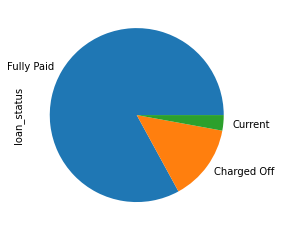

In [10]:
# Univariate Analysis
# loan status in total loans issued

print ((loan_df1.loan_status.value_counts()*100)/len(loan_df1))
loan_df1['loan_status'].value_counts().plot(kind ='pie')
# Observations
# 82.96 percent loans were fully paid.
# Close to 14% loans were charged off
# Currently on going loans are close to 3%


debt_consolidation   46.93
credit_card          12.92
other                10.05
home_improvement      7.49
major_purchase        5.51
small_business        4.60
car                   3.90
wedding               2.38
medical               1.74
moving                1.47
vacation              0.96
house                 0.96
educational           0.82
renewable_energy      0.26
Name: purpose, dtype: float64


<AxesSubplot:>

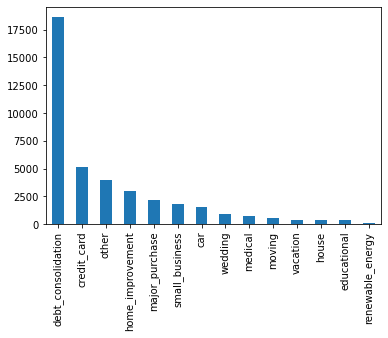

In [11]:
# Purpose of these loans: overview
# Observations 
# Most of the loans taken for debt consolidation(47%) and Credit card bill payment(12%)

print ((loan_df1.purpose.value_counts()*100)/len(loan_df1))
loan_df1['purpose'].value_counts().plot(kind ='bar')

Before Removal of Outliers :

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64
After Removal of Outliers :
count    39319.00
mean     65524.22
std      35215.89
min       4000.00
25%      40000.00
50%      58000.00
75%      81000.00
max     234996.00
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

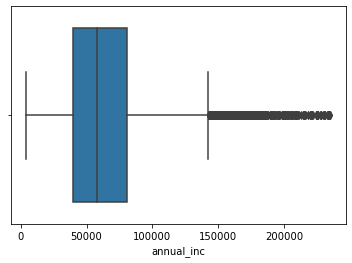

In [12]:
# # Univariate Analysis
# we will use the decribe function to get the statistics of individual Measures
# and also identify potential outliers which may deviate our findings
print('Before Removal of Outliers :\n')
print(loan_df1['annual_inc'].describe())

# Data cleaning
# Remove Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.

loan_df1 = loan_df1[loan_df1["annual_inc"] < loan_df1["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(loan_df1["annual_inc"].describe())
sns.boxplot(loan_df1.annual_inc)

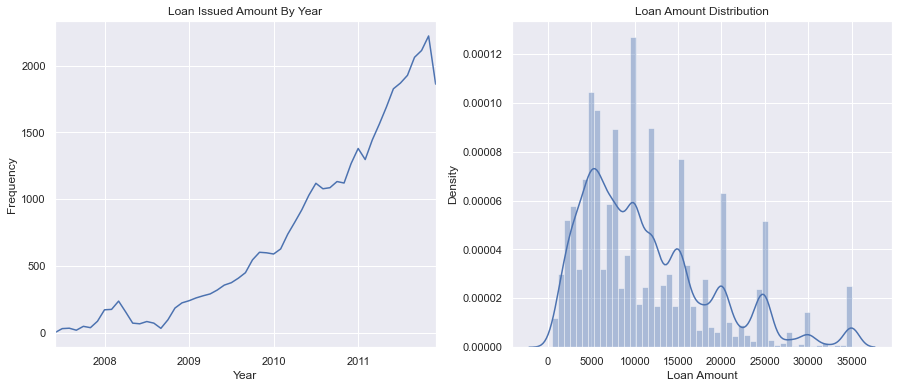

In [13]:
# Derived Columns Year and Month from issue_D
loan_df1.issue_d = pd.to_datetime(loan_df1.issue_d, format='%b-%y')
loan_df1['year']=loan_df1['issue_d'].dt.year
loan_df1['month']=loan_df1['issue_d'].dt.month

#Derived Columns
# categorise emp_length,loan_amnt,annual_inc,int_rate  into buckets
loan_df1['emp_length_bins'] = pd.cut(loan_df1['emp_length'], [0, 2, 4, 6, 8, 10], labels=['less than 2', 'between 2 to 4', 'between 4 to 6', 'between 6 to 8', 'more than 10'])
loan_df1['loan_amnt_bins'] = pd.cut(loan_df1['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', 'more than 28000'])
loan_df1['annual_inc_bins'] = pd.cut(loan_df1['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', 'more than 80000'])
loan_df1['int_rate_bins'] = pd.cut(loan_df1['int_rate'], [0, 10, 13, 16, 25], labels=['0-10', '10-13', '13-16', 'more than 16'])

year_dist = loan_df1.groupby(['issue_d']).size()

plt.figure(figsize=(15,6))
sns.set()

ax1 = plt.subplot(1, 2, 1)
ax1 = year_dist.plot()
ax1 = plt.title('Loan Issued Amount By Year')
ax1 = plt.xlabel('Year')
ax1 = plt.ylabel('Frequency')

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.distplot(loan_df['loan_amnt'])
ax2 = plt.title('Loan Amount Distribution')
ax2 = plt.xlabel('Loan Amount')

# Observations 

# The time series plot on the left shows a rising popularity of loan lending, there is drop after 2008 this could be due the 
# U.S Recession (housing market crash in 2008), after 2009 there is a sharp increase in Loan issue.
#The distribution of loan amount is to the right. Most borrowers applied loan of around 10,000.

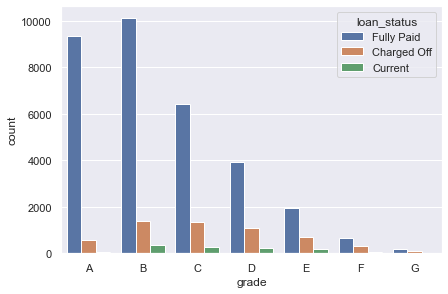

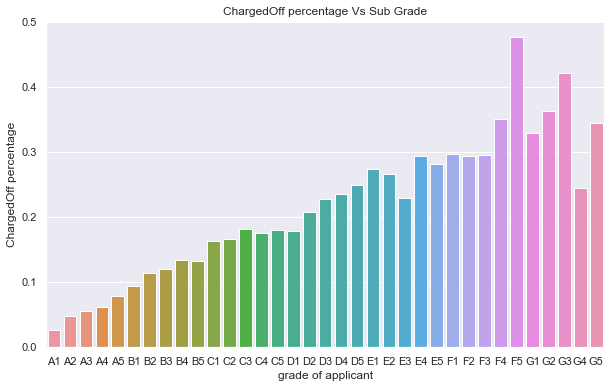

In [14]:
# Bivariate Analysis
# Grade versus Loan_Status
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
grade = sorted(loan_df1.grade.unique().tolist())
sns.countplot(x='grade', data=loan_df1, hue='loan_status', order=grade)

#Lets evaluate on the basis of proportion
sub_grade_vs_loan = pd.crosstab(loan_df1['sub_grade'],loan_df1['loan_status'])
sub_grade_vs_loan['Total'] = sub_grade_vs_loan['Charged Off']  + sub_grade_vs_loan['Fully Paid'] 
sub_grade_vs_loan['Chargedoff_Proportion'] = sub_grade_vs_loan['Charged Off'] / sub_grade_vs_loan['Total']
sub_grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(x =sub_grade_vs_loan.index,y="Chargedoff_Proportion",  data= sub_grade_vs_loan)
ax.set_title('ChargedOff percentage Vs Sub Grade')
ax.set_xlabel('grade of applicant')
ax.set_ylabel('ChargedOff percentage')      
plt.show()

#Observations

# From the following charts on grade and subgrade we can infer that among F and G, F5,G2,G3 are likely to charge off. 

In [15]:


# Loan purpose versus Loan Status

DF_PS = pd.crosstab(loan_df1['purpose'],loan_df1['loan_status'])
DF_PS['Total'] = DF_PS['Charged Off'] + DF_PS['Fully Paid'] 
DF_PS['FullyPaid%'] = round(((DF_PS['Fully Paid'] / DF_PS['Total'])*100),2)
DF_PS['Default%'] = round(((DF_PS['Charged Off'] / DF_PS['Total'])*100),2)
DF_PS.sort_values('Default%', ascending=False)
DF_PS.style.background_gradient(axis = None, cmap='coolwarm', subset = ['Default%','FullyPaid%',])

# Observation 
# Loans which fall under the small business purpose have the most risk involved, 27% default the logical reason for this
# could be that samll business and start ups always do not end up being profitable.
# Also the maximum good loans seem to fall under wedding and car loans.

loan_status,Charged Off,Current,Fully Paid,Total,FullyPaid%,Default%
purpose,,,,,,
car,157,50,1332,1489,89.460000,10.540000
credit_card,530,98,4406,4936,89.260000,10.740000
debt_consolidation,2723,575,15127,17850,84.750000,15.250000
educational,56,0,269,325,82.770000,17.230000
home_improvement,344,100,2517,2861,87.980000,12.020000
house,59,14,306,365,83.840000,16.160000
major_purchase,221,36,1922,2143,89.690000,10.310000
medical,106,12,570,676,84.320000,15.680000
moving,91,7,482,573,84.120000,15.880000


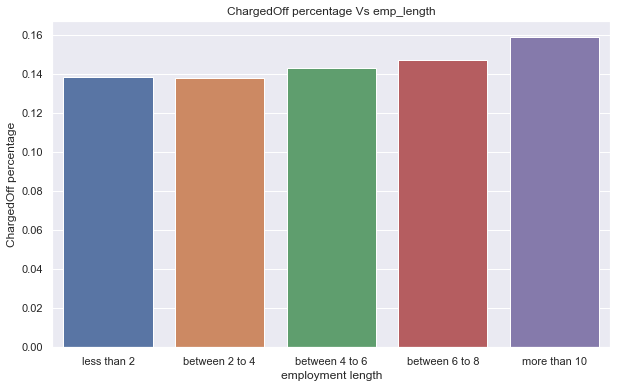

In [16]:
#Employment Length Vs Loan Status

emp_length_vs_loan = pd.crosstab(loan_df1['emp_length_bins'],loan_df1['loan_status'])
emp_length_vs_loan['Total'] = emp_length_vs_loan['Charged Off']+ emp_length_vs_loan['Fully Paid'] 
emp_length_vs_loan['Chargedoff_Proportion'] = emp_length_vs_loan['Charged Off'] / emp_length_vs_loan['Total']
emp_length_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(x =emp_length_vs_loan.index,y="Chargedoff_Proportion",  data= emp_length_vs_loan)
ax.set_title('ChargedOff percentage Vs emp_length')
ax.set_xlabel('employment length')
ax.set_ylabel('ChargedOff percentage')      
plt.show()

# Observations - ccharge off tend to increase as the employee length goes higher but it is not very considerate,
#as we can also see that 2-4 years lenghth charge off is less than 0-2 length

loan_status      Charged Off  Current  Fully Paid  Total  \
annual_inc_bins                                            
0-20000                  196        0         993   1189   
20000-40000             1059        0        7629   8688   
40000-60000             1572        0       10036  11608   
60000-80000             1195      323        6343   7538   
more than 80000         1530      796        7647   9177   

loan_status      Chargedoff_Proportion  
annual_inc_bins                         
0-20000                           0.16  
20000-40000                       0.12  
40000-60000                       0.14  
60000-80000                       0.16  
more than 80000                   0.17  


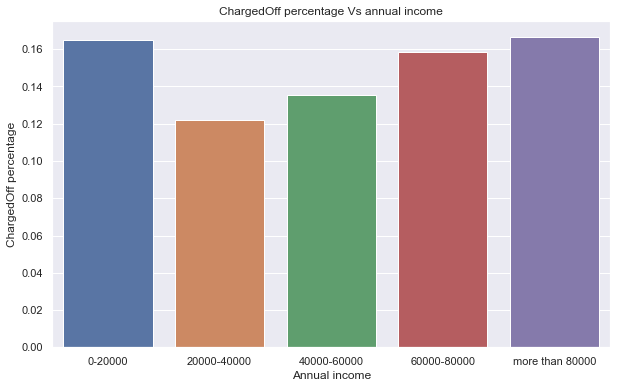

In [17]:
# Lets evaluate annual income

annual_inc_vs_loan = pd.crosstab(loan_df1['annual_inc_bins'],loan_df1['loan_status'])
annual_inc_vs_loan['Total'] = annual_inc_vs_loan['Charged Off']  + annual_inc_vs_loan['Fully Paid'] 
annual_inc_vs_loan['Chargedoff_Proportion'] = annual_inc_vs_loan['Charged Off'] / annual_inc_vs_loan['Total']
annual_inc_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)
print (annual_inc_vs_loan)

plt.figure(figsize=(10,6))
ax = sns.barplot(x =annual_inc_vs_loan.index,y="Chargedoff_Proportion",  data= annual_inc_vs_loan)
ax.set_title('ChargedOff percentage Vs annual income')
ax.set_xlabel('Annual income')
ax.set_ylabel('ChargedOff percentage')      
plt.show()

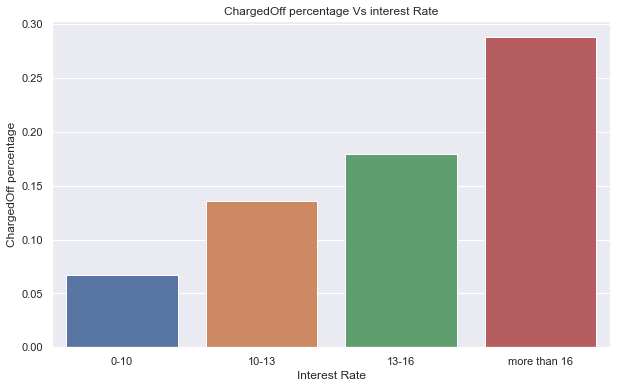

In [18]:
#Interest rate Vs Loan Status
int_rate_bins_vs_loan = pd.crosstab(loan_df1['int_rate_bins'],loan_df1['loan_status'])
int_rate_bins_vs_loan['Total'] = int_rate_bins_vs_loan['Charged Off'] + int_rate_bins_vs_loan['Fully Paid'] 
int_rate_bins_vs_loan['Chargedoff_Proportion'] = int_rate_bins_vs_loan['Charged Off'] / int_rate_bins_vs_loan['Total']
int_rate_bins_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(x =int_rate_bins_vs_loan.index,y="Chargedoff_Proportion",  data= int_rate_bins_vs_loan)
ax.set_title('ChargedOff percentage Vs interest Rate')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('ChargedOff percentage')      
plt.show()

# The observations are strighforward more the intrest rate more the chances of charge off. 

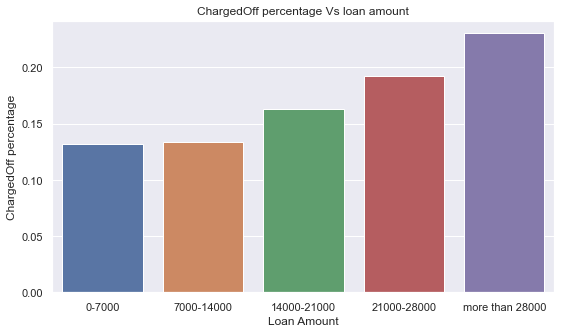

In [19]:
#Loam amount Vs loan status
loan_amnt_bins_vs_loan = pd.crosstab(loan_df1['loan_amnt_bins'],loan_df1['loan_status'])
loan_amnt_bins_vs_loan['Total'] = loan_amnt_bins_vs_loan['Charged Off'] + loan_amnt_bins_vs_loan['Fully Paid'] 
loan_amnt_bins_vs_loan['Chargedoff_Proportion'] = loan_amnt_bins_vs_loan['Charged Off'] / loan_amnt_bins_vs_loan['Total']
loan_amnt_bins_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

plt.figure(figsize=(9,5))
ax = sns.barplot(x =loan_amnt_bins_vs_loan.index,y="Chargedoff_Proportion",  data= loan_amnt_bins_vs_loan)
ax.set_title('ChargedOff percentage Vs loan amount')
ax.set_xlabel('Loan Amount')
ax.set_ylabel('ChargedOff percentage')      
plt.show()

# Observation - Higher loan amout tends to have higher percentage of charge off's

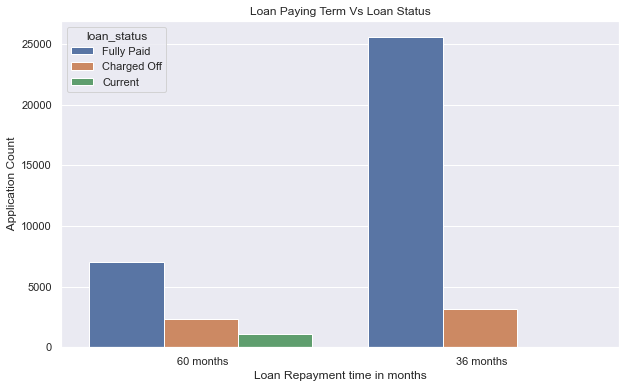

In [20]:
#Loan status Vs Loan Paying term
plt.figure(figsize=(10,6))
ax = sns.countplot(x="term",data=loan_df1,hue='loan_status')
ax.set_title('Loan Paying Term Vs Loan Status')
ax.set_xlabel('Loan Repayment time in months')
ax.set_ylabel(' Application Count')      
plt.show()

# short term loans seem to have a higher Charge off rate

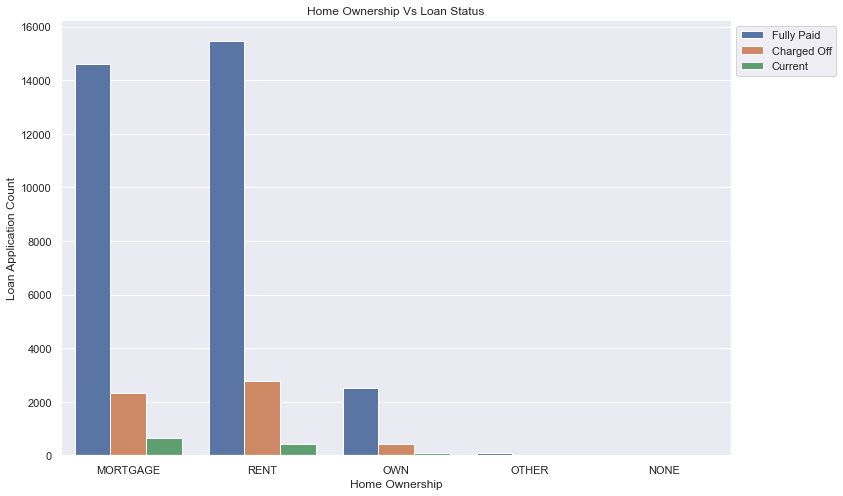

In [21]:
#Loan status Vs Home Ownership
plt.figure(figsize=(12,8))
ax = sns.countplot(x="home_ownership",data=loan_df1,hue='loan_status')
ax.set_title('Home Ownership Vs Loan Status')
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Loan Application Count')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


# observations 
# Loan applicants who are living in a rented house or those paying mortage are more likely to charge off. 
# Home owners seem to have the least charge off ratio.

In [23]:
#  Variables that impact directly or indirectly the chance of default hence becoming a potential charge off is as follows.

# 1. Annual Income of Applicant
# 2. Grade/Subgrade
# 3. employment length.
# 4. Home Ownership
# 5. Loan Amount
# 6. Interest Rate
# 7. Purpose of loan

# Conclusion and Recommendation

#Based on the observations of the above variables and its impact on charge off, We suggest that 

# 1. Loan apllicants whose annaul income falls between 0 to 20,000 and if the Subgrade is F5,G2 or G3 then there is high chnance that
# these applicants could become potential charge off's
# 2. We see a risk of charge off when the the purpose of loan is samll business aslo if the time horizon to pay this loan amount is less than 36 months
# on the contrary if the loan purpose is wedding or vehicele laon (car) then the these tend to be good loans.
# Loan applicants who are living in a rented house or those paying mortage are more likely to be charge off. 
# Home owners seem to have the least charge off ratio. 


# The most risky loans are those whose applicants are paying mortgage or rent and they are purpose is listed as small business 
# and their sub grades fall under F5, G2 or G3, along with these factors if the intrest rate is also higher then there is high chance of charge off.